# Corpus Insights

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_DIR_PATH = "../data/"
CLEAN = "c"
LANG = ""

INDUSTRIES_PATH_CSV = DATA_DIR_PATH + "industries.csv"
TRAIN_PATH_CSV = DATA_DIR_PATH + CLEAN + "train" + LANG + ".csv"
TEST_PATH_CSV = DATA_DIR_PATH + CLEAN + "test" + LANG + ".csv"

In [7]:
%%time
train = pd.read_csv(TRAIN_PATH_CSV, lineterminator='\n').fillna("")
train.shape

CPU times: user 1min 7s, sys: 25.7 s, total: 1min 33s
Wall time: 1min 32s


(30292, 23)

In [8]:
train.head(1)

,url,group_representative,group_representative_label,text,chtml,<meta>_title,<meta>_keywords,<meta>_description,<title>,<h1>,...,<h5>,<h6>,<b>,<strong>,<em>,<i>,<p>,<a>,<li>,country
0,http://12-18.com,30,"Leisure, Travel & Tourism",\n\nInvestment Management.\n\nEin glückliches ...,<html>\n<head>\n\t<title>12.18. Investment Man...,12.18. Investment Management - ANDERS. AUS PRI...,"12 18, 1218 Investment, 12 18 Invest, lim, lin...",Ein glückliches Investment ist das Resultat ha...,12.18. Investment Management - ANDERS. AUS PRI...,,...,Biggesee Investment Management | Herr John ...,,,,,Wir nehmen den Datenschutz nach EU-DSGVO erns...,12.18. Investment Management GmbHKönigsallee ...,Projekte Biggesee karriere Investment Managem...,Aktuelles Projekte Home Hospitality Management...,DE


In [46]:
freq = {}

for col in sorted(train.columns):
    if col.startswith("<"):
        length = len(train[train[col] != ""])
        abs_freq = np.round(length/30292, decimals=3)
        freq[col] = abs_freq
        print(f"{col}:", length, abs_freq)

<a>: 29874 0.986
<b>: 5433 0.179
<em>: 2997 0.099
<h1>: 20810 0.687
<h2>: 23819 0.786
<h3>: 20427 0.674
<h4>: 12935 0.427
<h5>: 5844 0.193
<h6>: 2904 0.096
<i>: 2268 0.075
<li>: 28261 0.933
<meta>_description: 22779 0.752
<meta>_keywords: 18 0.001
<meta>_title: 17021 0.562
<p>: 29149 0.962
<strong>: 16424 0.542
<title>: 30021 0.991


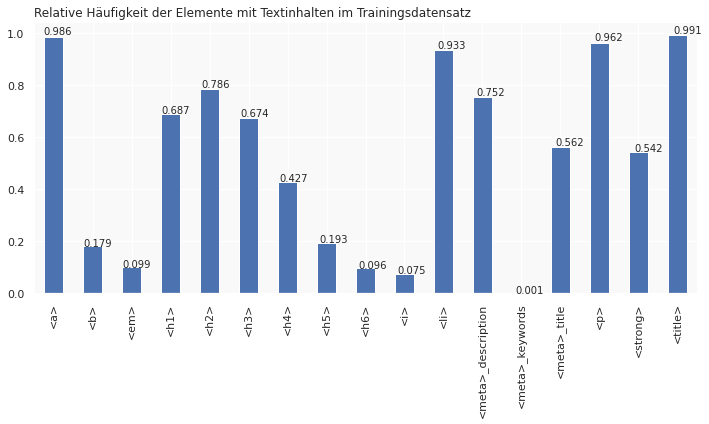

In [60]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = pd.DataFrame.from_dict(freq, orient="index", columns=["element"])

ax = df.plot(kind="bar", figsize=(10,6), legend=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.009, p.get_height() * 1.009))

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 10})
#plt.legend()
plt.title("Relative Häufigkeit der Elemente mit Textinhalten im Trainingsdatensatz", loc="left")
#plt.savefig("img/industries_distribution", dpi=300)
plt.show()

In [21]:
train[train.country == "ZH-CN"].head(1)

,url,group_representative,group_representative_label,text,chtml,<meta>_title,<meta>_keywords,<meta>_description,<h1>,<h2>,...,<h4>,<h5>,<b>,<strong>,<em>,<i>,<p>,<a>,<li>,country
582,http://qidian.qq.com,96,Information Technology and Services,腾讯企点_智慧客户沟通运营平台_为企业提供智慧营销服务全链路SaaS解决方案\n\n首页\n...,<html>\n\n<head>\n \n \n \n \n\t\t...,NaN,NaN,以即时通讯、音视频、人工智能、大数据、云呼叫中心等科技为基础，结合微信、QQ社交通路，提供从...,首页 定制产品咨询,腾讯企点正在为各行各业创造更大价值 \n 营销、销售、...,...,NaN,NaN,NaN,企业QQ 营销QQ \n \n ...,满足OTC合规,\n,\n 获取全面的操作指引与学...,\n \n ...,\n 合作伙伴\n ...,ZH-CN


In [22]:
train.country.value_counts()

DE       19864
EN        8180
NL         435
FR         410
ES         303
PT         249
IT         152
PL          83
TR          74
SV          62
DA          50
CS          42
RU          40
ZH-CN       37
RO          33
NO          31
CA          30
VI          24
JA          20
HR          18
KO          17
HU          16
ID          16
EL          14
FI          11
BG          10
ET           7
SQ           6
FA           6
UK           6
SK           5
HE           5
SL           5
TL           4
AR           4
TH           4
AF           4
LT           3
MK           3
LV           3
SW           3
SO           2
NE           1
Name: country, dtype: int64

In [23]:
train.group_representative_label.value_counts()

Information Technology and Services     6019
Management Consulting                   2665
Mechanical or Industrial Engineering    2305
Marketing and Advertising               2086
Consumer Goods                          2024
Machinery                               2021
Financial Services                      1648
Construction                            1541
Medical Practice                        1426
Automotive                              1270
Media Production                         966
Real Estate                              946
Wholesale                                929
Human Resources                          772
Recreational Facilities and Services     622
Logistics and Supply Chain               590
Telecommunications                       550
Legal Services                           513
Insurance                                499
Leisure, Travel & Tourism                490
Renewables & Environment                 410
Name: group_representative_label, dtype: int64

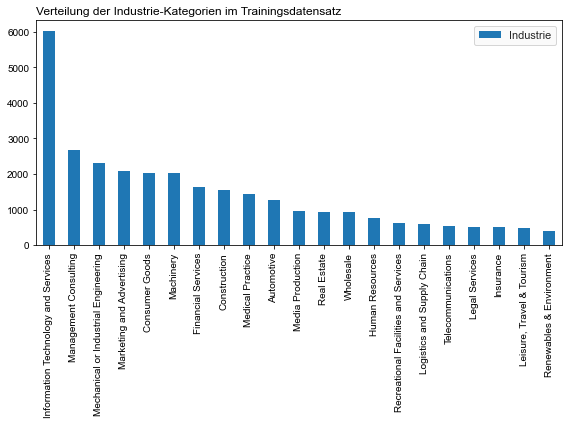

In [12]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

train.group_representative_label.value_counts().plot(kind="bar",
                                                     figsize=(8,6),
                                                     label="Industrie")

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 10})
plt.legend()
plt.title("Verteilung der Industrie-Kategorien im Trainingsdatensatz", loc="left")
#plt.savefig("img/industries_distribution", dpi=300)
plt.show()

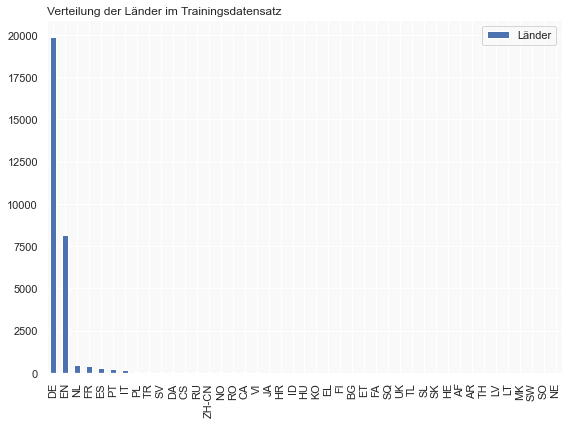

In [13]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

train.country.value_counts().plot(kind="bar", figsize=(8,6), label="Länder")

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 10})
plt.legend()
plt.title("Verteilung der Länder im Trainingsdatensatz", loc="left")
#plt.savefig("img/country_distribution", dpi=300)
plt.show()